In [1]:
# ボストンの土地を重回帰で予測

In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# データセットを読み込み
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()                   # インスタンスを生成

# Pandasのデータフレームに変換
# (変数のarrya, 変数名を並べたリスト)
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)

df_target = pd.DataFrame(boston.target, columns=['MEDV'])

df = pd.concat([df_data, df_target], axis=1)

X = df.loc[:, ['LSTAT', 'RM']].values
y = df.loc[:, ['MEDV']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 決定係数  R2
得られた超平面が特徴空間内に存在するデータ点にどれだけ沿ったものになっているかという指標

In [3]:
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

train: 0.651
test : 0.607


# 自由度調整済み決定係数
実は､決定係数には予測の役に立たない変数を追加していくと､数値が意味もなく大きくなっていってしまうという欠点があり､それを改善

In [4]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [5]:
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

train: 0.648955
test : 0.601704


# RMSE
通常､予測が正解からどれだけズレるかを表した指標(標準偏差のようなもの)

In [8]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

train: 5.439
test : 5.721


### 解釈
testのRMSEを見ると､｢現在のモデルでは､通常､予測は正解から5.7千ドルずれる｣ということがわかります｡<br>
describe()によると､MEDVは平均が22.53､標準偏差が9.197でした｡<br>
なので､現状のRMSEはそれに対してかなり大きいといえます｡決定係数からもわかったとおり､これではモデルの性能が高いとは言えません｡

# 残差プロット
予測の外れ方の傾向を視覚的に掴む手法<br>
決定係数が大きいほど残差は0に集まる。<br>
外れ値がランダムに散らばっていれば問題ではないが、外れ値が規則正しい場合はそれらを取り除く。

In [9]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

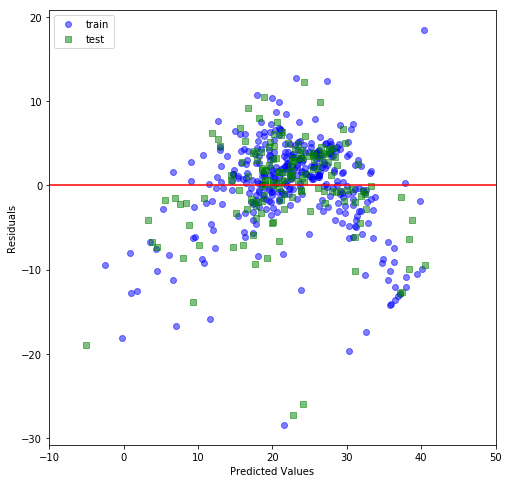

In [10]:
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

# 標準化重回帰分析
重回帰によって各説明変数の予測における重要性を評価する手法

In [11]:
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(boston.data) # すべての説明変数を変換
y_std = ss.fit_transform(y)

In [12]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# 標準偏回帰係数を出力
lr_std.coef_

array([[-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
         0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
        -0.22443985,  0.09323458, -0.40799686]])